In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/master/medical_examination.csv')
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


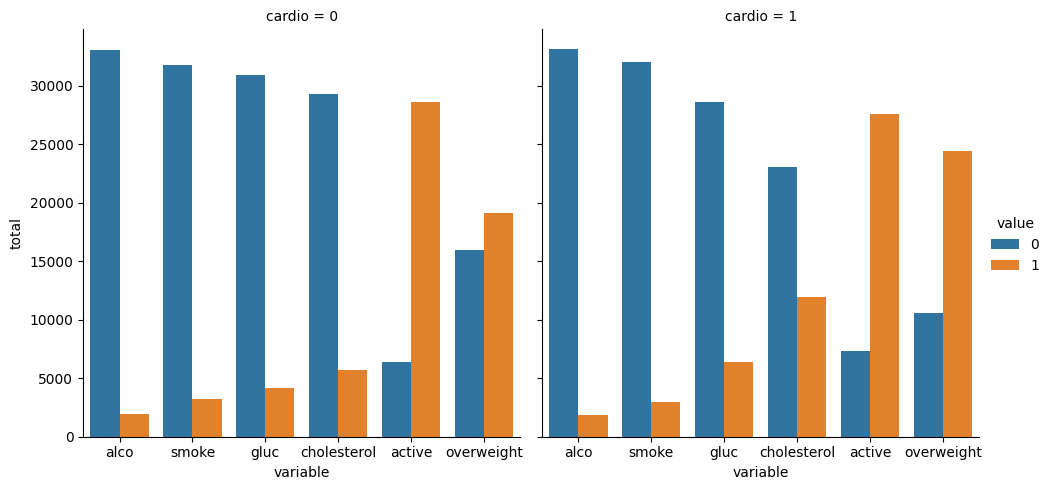

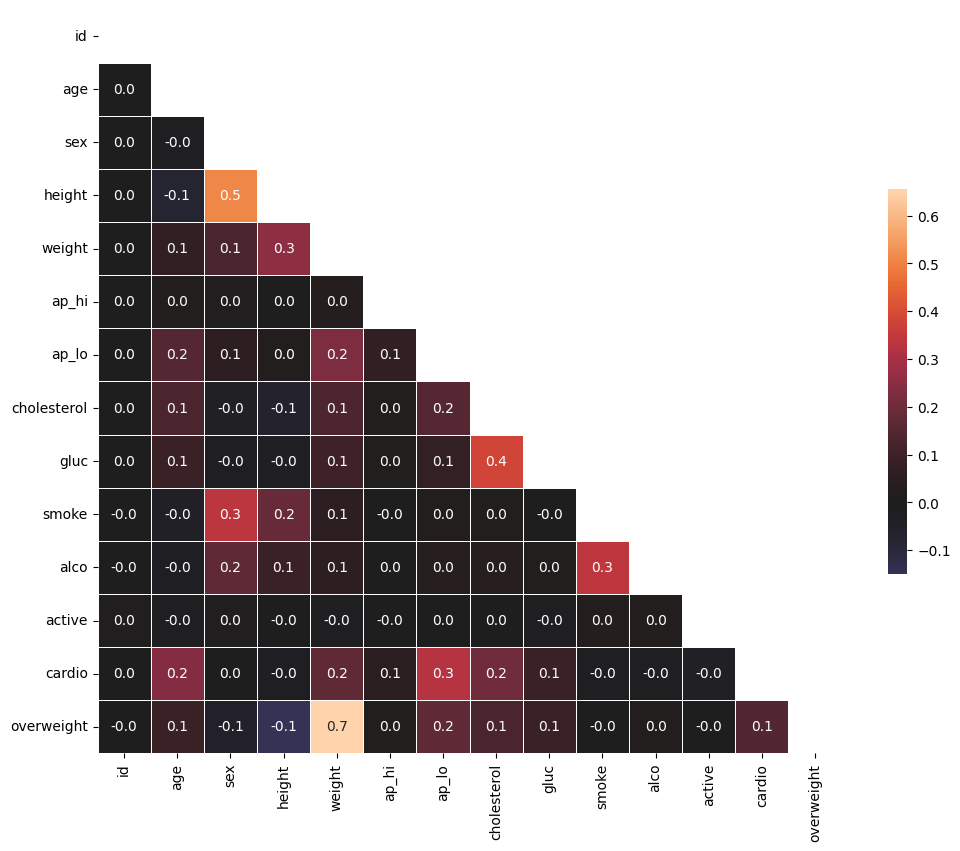

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/master/medical_examination.csv')

# 1. Add overweight column (BMI > 25 → 1 else 0)
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)

# 2. Normalize data: 0 = good, 1 = bad (for cholesterol and glucose)
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# 3. Categorical Plot
def draw_cat_plot():
    # 4. Melt data
    df_cat = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    )

    # 5. Group and reformat data
    df_cat = df_cat.value_counts().reset_index(name='total')

    # 6. Draw seaborn catplot
    g = sns.catplot(
        data=df_cat,
        x='variable',
        y='total',
        hue='value',
        col='cardio',
        kind='bar'
    )

    fig = g.fig
    return fig

# 7. Heat Map
def draw_heat_map():
    # 8. Clean data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 9. Correlation matrix
    corr = df_heat.corr()

    # 10. Generate mask
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 11. Set up figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # 12. Plot heatmap
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".1f",
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5}
    )

    return fig

# Display both visualizations
cat_fig = draw_cat_plot()
cat_fig.show()

heat_fig = draw_heat_map()
heat_fig.show()
